In [51]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Create the data and the model

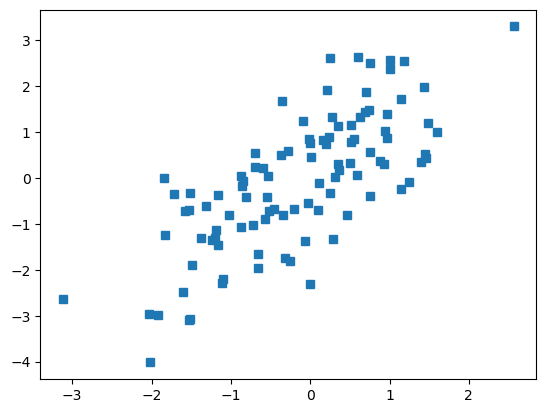

In [52]:
# Generating Random Data:
# We are creating synthetic data for a simple scatter plot.
# N represents the number of data points we want to generate.
N = 100

# Generating Random x Values:
# We use PyTorch's `torch.randn()` function to generate N random values.
# These values represent the x-coordinates of our data points.
x = torch.randn(N, 1)

# Generating Random y Values:
# We add another set of random values to x to create a simple linear relationship.
# This simulates a scenario where y is somewhat dependent on x but with some random noise.
y = x + torch.randn(N, 1)

# Creating a Scatter Plot:
# We use Matplotlib, a popular Python plotting library, to create a scatter plot.
# The 's' argument specifies that we want to use square markers for the data points.
# We are plotting x on the x-axis and y on the y-axis.
plt.plot(x, y, 's')

# Displaying the Plot:
# Finally, we use plt.show() to display the scatter plot.
# This visualizes our generated data points on a 2D plane.
plt.show()


In [53]:
# Building a Simple Neural Network Model:
# We are defining a simple neural network model using PyTorch's nn.Sequential.
# This model consists of an input layer, an activation function, and an output layer.

# Initialize the Model:
# We create an instance of nn.Sequential to define our neural network model.
ANNreg = nn.Sequential(

    # Input Layer:
    # The input layer has 1 input feature (1-dimensional input).
    nn.Linear(1, 1),  # Input layer with 1 input neuron and 1 output neuron.

    # Activation Function:
    # We apply the Rectified Linear Unit (ReLU) activation function.
    # ReLU is commonly used in hidden layers to introduce non-linearity.
    nn.ReLU(),

    # Output Layer:
    # The output layer has 1 neuron, which is the final output of our model.
    nn.Linear(1, 1)   # Output layer with 1 input neuron and 1 output neuron.
)


In [54]:
# Setting Model Meta-Parameters:
# In this code cell, we specify various meta-parameters for training our neural network model.

# Learning Rate:
# Learning rate determines the step size during optimization.
# It controls how quickly the model adjusts its parameters based on the loss.
# A smaller learning rate may lead to slower convergence but better stability.
learningRate = 0.05

# Loss Function:
# We choose Mean Squared Error (MSE) Loss for this regression task.
# MSE is commonly used for regression problems, where the goal is to minimize the
# squared difference between the predicted and actual values.
lossfun = nn.MSELoss()

# Optimizer:
# Stochastic Gradient Descent (SGD) is a popular optimization algorithm.
# We use SGD to update the model's parameters during training.
# The learning rate (lr) determines the step size in each update.
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)


# Select data for training

In [55]:
# Selecting Training Data:
# In this code cell, we are randomly selecting a subset of data points for training.

# Number of Data Points (N):
# The variable N represents the total number of data points in the dataset.
# It's important to note that N is hard-coded to 100 in this example.

# Random Selection:
# We use NumPy's random.choice function to randomly select 80 indices from the range [0, N) without replacement.
trainidx = np.random.choice(range(N), 80, replace=False)

# Boolean Mask:
# We initialize a boolean vector, trainBool, with all elements set to False.
# This vector will be used to indicate which data points are selected for training.
trainBool = np.zeros(len(x), dtype=bool)

# Mark Selected Data:
# We set the elements at the randomly selected indices (trainidx) to True in trainBool.
trainBool[trainidx] = True

# Display Sizes:
# We print the sizes of the selected training data (True values in trainBool) and
# the remaining data (False values in trainBool).
print("Training Data Size:", x[trainBool].shape)
print("Remaining Data Size:", x[~trainBool].shape)


Training Data Size: torch.Size([80, 1])
Remaining Data Size: torch.Size([20, 1])


# Train the model

In [56]:
# Number of Epochs:
# The variable numepochs represents the total number of training epochs, and it is set to 500.

# Training Loop:
# We iterate over each epoch using a for loop, with epochi ranging from 0 to numepochs - 1.
numepochs = 500
for epochi in range(numepochs):

    # Forward Pass:
    # Inside each epoch, we perform a forward pass through the neural network model (ANNreg).
    # We pass the input data x, which includes only the data points marked as True in trainBool.
    # This computes the predicted values yHat.
    yHat = ANNreg(x[trainBool])

    # Compute Loss:
    # We calculate the loss between the predicted values (yHat) and the true target values (y)
    # for the selected training data points. The loss function used here is Mean Squared Error (MSE).
    loss = lossfun(yHat, y[trainBool])

    # Backpropagation:
    # We then perform backpropagation to compute gradients and update the model's weights.
    # This is done by calling optimizer.zero_grad() to reset the gradients, followed by loss.backward()
    # to compute gradients based on the loss, and finally, optimizer.step() to update the model parameters.
    optimizer.zero_grad()  # Reset gradients.
    loss.backward()        # Compute gradients.
    optimizer.step()       # Update model parameters.


In [57]:
# Compute Losses of the TEST Set:
# First, we compute predictions (predYtest) for the test set. We use the trained ANNreg model
# to make predictions for the data points that were not part of the training set (indicated by ~trainBool).
predYtest = ANNreg(x[~trainBool])

# Calculate Test Loss:
# Next, we calculate the test loss by taking the mean squared difference between the predicted values (predYtest)
# and the true target values (y[~trainBool]) for the test set.
testloss = (predYtest - y[~trainBool]).pow(2).mean()

# Print Out Final TRAIN and TEST Losses:
# Finally, we print out the final training and test losses using f-strings for formatting.
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')


Final TRAIN loss: 0.90
Final TEST loss: 1.44


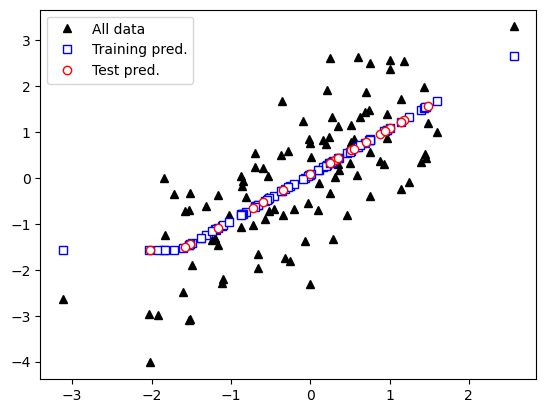

In [58]:
# Predictions for Final Training Run:
# First, we obtain predictions (predYtrain) for the data points that were part of the training set.
# We use the trained ANNreg model to make these predictions.

predYtrain = ANNreg(x[trainBool]).detach().numpy()

# Plot the Data:
# We create a plot to visualize the data and predictions.
# - 'x' and 'y' are plotted as black triangles ('k^') to represent all data points.
# - Training predictions (predYtrain) are plotted as blue squares ('bs') with white markers.
# - Test predictions (predYtest) are plotted as red circles ('ro') with white markers.
# We also add a legend to the plot to label the different elements.

plt.plot(x, y, 'k^', label='All data')
plt.plot(x[trainBool], predYtrain, 'bs', markerfacecolor='w', label='Training pred.')
plt.plot(x[~trainBool], predYtest.detach(), 'ro', markerfacecolor='w', label='Test pred.')
plt.legend()
plt.show()


# Additional explorations